This notebook:


*   Fetches and cleans hansard transcripts in 2017.
*   Gets the inverse document frequency for prominent words excluding stopwords with TfidfVectorizer.
*   Visualises the distribution and sorts and shows for a few documents the words that define it most.

TODO:

*   Find some way to cluser these documents by similarity using these TFIDF vectors as a feature.
*   Once we have clusters, how to label them suitably?






In [0]:
import urllib.request
import xml.etree.ElementTree as ET
from sklearn.feature_extraction.text import TfidfVectorizer

Fetch each day's hansard text from JANUARY, and append to **allResponses**

In [0]:
allResponses = []
url_prefix = 'https://www.theyworkforyou.com/pwdata/scrapedxml/debates/debates'
url_suffix = '.xml'

yyyy = 2017
for mm in range(1,13):
  debates_count = 0
  for dd in range(1,32):
    for c in range(97,101):
      constructed_date = str(yyyy) + '-' + str(mm).zfill(2) + '-' + str(dd).zfill(2) + chr(c)
      try:
        response = urllib.request.urlopen(url_prefix + constructed_date + url_suffix)
        allResponses.append(response.read())
        # print('Fetched: ' + url_prefix + constructed_date + url_suffix)
        debates_count += 1
        break
      except Exception as ex:
        # print('Not available: ' + url_prefix + constructed_date + url_suffix)
        template = "An exception of type {0} occurred."
        message = template.format(type(ex).__name__)
        # print(message)
        # ignore
        break
  print('Fetched ' + str(debates_count) + ' debates for month: ' + str(mm))
# NOW we have all responses
print('TOTAL: ' + str(len(allResponses)))

Fetched 17 debates for month: 1
Fetched 14 debates for month: 2
Fetched 19 debates for month: 3
Fetched 7 debates for month: 4
Fetched 0 debates for month: 5
Fetched 9 debates for month: 6
Fetched 12 debates for month: 7
Fetched 0 debates for month: 8
Fetched 7 debates for month: 9
Fetched 15 debates for month: 10
Fetched 17 debates for month: 11
Fetched 13 debates for month: 12
TOTAL: 130


read each raw XML response from **allResponses** and strip out embedded XML, place into **documents**

In [0]:
documents = []

for xml_doc in allResponses:
  tree = ET.ElementTree(ET.fromstring(xml_doc))
  final_str = ''

  for node in tree.iter('p'):
    childs_text = ''
    for subnode in node:
      if (subnode.text is not None) and (subnode.tail is not None):
        childs_text = subnode.text + subnode.tail
        node.remove(subnode)
      if node.text is None:
        continue
      else:
        final_str += node.text + " " + childs_text
        
  documents.append(final_str)

for i in documents:
  print(i)

I thank  the hon. Member for Blackpool South (Gordon Marsden) again for his amendments. I will begin by discussing amendment 1, which affects clause 14. I have to stress that, in the unlikely event that an FE body becomes insolvent, we want to ensure that any disruption to students’ studies is avoided or minimised as far as possible. It will be for the education administrator to deal with that, and according to the relevant clause in the Bill, they will be an insolvency practitioner—they are likely to come from one of the bigger companies and to have education experience. It will be the same system as with insolvent companies.Our expectation is that that will include discussions with the key stakeholders, local authorities and others. Where appropriate, it may also involve—I brought this up in Committee—a conversation with the care leaver’s personal adviser. We discussed in Committee the additional personal and pastoral support that care leavers might need. I undertook to consider the 

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(documents)
print('vectorizer.vocabulary_: ')
print(vectorizer.vocabulary_)
print('vectorizer.idf_: ')
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([documents[2]])
# summarize encoded vector
print('vector shape and below array')
print(vector.shape)
print(vector.toarray())

vectorizer.vocabulary_: 
{'thank': 3954, 'hon': 2000, 'member': 2527, 'blackpool': 582, 'south': 3699, 'gordon': 1855, 'marsden': 2482, 'amendments': 310, 'begin': 530, 'discussing': 1304, 'amendment': 309, 'affects': 241, 'clause': 826, '14': 15, 'stress': 3796, 'unlikely': 4127, 'event': 1536, 'fe': 1665, 'body': 590, 'insolvent': 2142, 'want': 4214, 'ensure': 1485, 'disruption': 1314, 'students': 3808, 'studies': 3809, 'avoided': 475, 'minimised': 2565, 'far': 1651, 'possible': 3000, 'education': 1407, 'administrator': 217, 'deal': 1139, 'according': 167, 'relevant': 3301, 'insolvency': 2141, 'practitioner': 3020, 'likely': 2370, 'come': 868, 'bigger': 565, 'companies': 895, 'experience': 1581, 'expectation': 1576, 'include': 2086, 'discussions': 1306, 'key': 2265, 'stakeholders': 3738, 'local': 2399, 'authorities': 463, 'appropriate': 369, 'involve': 2195, 'brought': 649, 'committee': 888, 'conversation': 1022, 'care': 714, 'leaver': 2330, 'personal': 2925, 'adviser': 230, 'discuss

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 8.000e+00,
        0.000e+00, 2.500e+01, 0.000e+00, 8.200e+01, 0.000e+00, 0.000e+00,
        2.210e+02, 0.000e+00, 0.000e+00, 3.990e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 8.110e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.797e+03]),
 array([1.40546511, 1.47713549, 1.54880587, 1.62047624, 1.69214662,
        1.763817  , 1.83548738, 1.90715776, 1.97882814, 2.05049852,
        2.1221689 , 2.19383927, 2.26550965, 2.33718003, 2.40885041,
        2.48052079, 2.55219117, 2.62386155, 2.69553193, 2.7672023 ,
        2.83887268, 2.91054306, 2.98221344, 3.05388382, 3.1255542 ,
        3.19722458]),
 <a list of 25 Patch objects>)

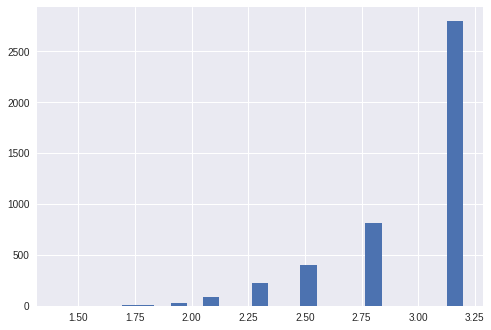

In [0]:
import numpy as np
import matplotlib as plt

plt.pyplot.hist(vectorizer.idf_, 25)

In [0]:
count = 0

for document in documents:
  vector = vectorizer.transform([document])

  documentInAnalysis = vector.toarray()[0]

  flippedTokens = dict((v,k) for k,v in vectorizer.vocabulary_.items())

  print("most unique words in doc #"+str(count), [flippedTokens[x] for x in np.flipud(np.argsort(documentInAnalysis))] )
  count+=1

most unique words in doc #0 ['committee', 'personal', 'education', 'insolvent', 'insolvency', 'event', 'clause', 'care', 'authorities', 'companies', 'ensure', 'local', 'winded', 'kelvin', 'undertook', '174', 'adviser', 'studies', 'students', 'fe', 'expectation', 'marsden', 'luton', 'college', 'advisers', 'practitioner', 'pastoral', 'unlikely', 'parenting', 'administrator', 'disruption', 'hopkins', 'consuming', 'minimised', 'leaver', 'leavers', 'hon', 'member', 'according', 'promise', 'conversation', 'likely', 'includes', 'relevant', 'guidance', 'corporate', 'involve', 'affects', 'responsible', 'young', 'avoided', 'technical', 'bigger', 'responsibilities', 'stakeholders', 'blackpool', 'affecting', 'keeping', 'amendment', 'discussions', 'amendments', 'person', 'discussed', 'appropriate', 'include', 'consider', 'advice', 'december', 'body', 'gordon', 'begin', 'stress', 'children', 'experience', 'introduced', 'role', '14', 'social', 'discussing', 'report', 'brought', 'hope', 'support', 'ma

Here is a toy example of tfidf to play with.

In [0]:
text = ["The quick brown fox jumped over the lazy dog.",
		"The dog.",
		"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print('vectorizer.vocabulary_: ')
print(vectorizer.vocabulary_)
print('vectorizer.idf_: ')
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[1]])
# summarize encoded vector
print('vector shape and below array')
print(vector.shape)
print(vector.toarray())

vectorizer.vocabulary_: 
{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
vectorizer.idf_: 
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
vector shape and below array
(1, 8)
[[0.         0.78980693 0.         0.         0.         0.
  0.         0.61335554]]
